In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import nengo

In [10]:
# Create the model object
model = nengo.Network(label='Oscillator')
with model:
    # Create the ensemble for the oscillator
    neurons = nengo.Ensemble(200, dimensions=2)

In [11]:
from nengo.processes import Piecewise
with model:
    # Create an input signal
    input_node = nengo.Node(Piecewise({0: [1, 0], 0.1: [0, 0]}))

    # Connect the input signal to the neural ensemble
    nengo.Connection(input_node, neurons)

    # Create the feedback connection
    nengo.Connection(neurons, neurons, transform=[[1, 1], [-1, 1]], synapse=0.1)

In [12]:
# Add probes
with model:
    input_probe = nengo.Probe(input_node, 'output')
    neuron_probe = nengo.Probe(neurons, 'decoded_output', synapse=0.1)

In [13]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

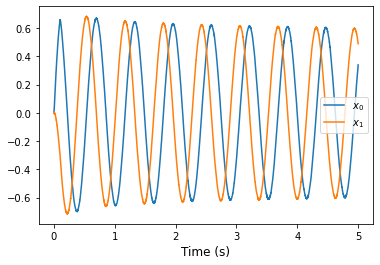

In [14]:
plt.figure()
plt.plot(sim.trange(), sim.data[neuron_probe])
plt.xlabel('Time (s)', fontsize='large')
plt.legend(['$x_0$', '$x_1$']);

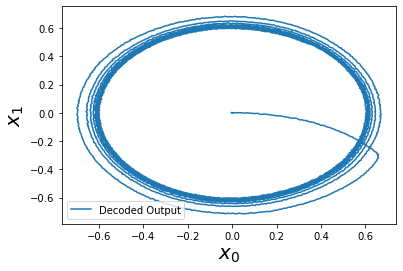

In [15]:
data = sim.data[neuron_probe]
plt.figure()
plt.plot(data[:, 0], data[:, 1], label='Decoded Output')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)
plt.legend();